Types of Gradient Descent:
1. **Batch Gradient Descent**: Updates the model using the entire dataset in each iteration.

2. **Stochastic Gradient Descent (SGD)**: Updates the model using a single randomly chosen data point in each iteration.

3. **Mini-Batch Gradient Descent**: Updates the model using a small subset (batch) of the dataset in each iteratio

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure


In [35]:
data =  pd.read_csv("/content/homeprices_Pune.csv")
data

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


#Data Preprocessing


### Min Max Scaler Trasform: (X-min)/(Max-Min)

In [36]:
max_area=np.max(data['area'])
min_area=np.min(data['area'])
max_area,min_area
data['area'] = data['area'].apply(lambda x:(x-min_area)/(max_area-min_area))

max_price=np.max(data['price'])
min_price=np.min(data['price'])
max_price,min_price
data['price'] = data['price'].apply(lambda x:(x-min_price)/(max_price-min_price))

In [37]:
data

,area,bedrooms,price
0,0.088276,2,0.052370
1,0.620690,4,0.651852
2,0.220690,3,0.222222
3,0.248621,3,0.318519
4,0.137931,2,0.140741
5,0.127586,2,0.044444
6,0.666207,4,0.762963
7,0.862069,4,0.911111
8,0.175862,3,0.133333
9,1.000000,5,1.000000


# Batch Gradient Descent

In [38]:
X=data[['area','bedrooms']]
y=data['price']

In [39]:
class Batch_Gradient_Descent:
  def __init__(self,X,y):
    self.X=X
    self.y=y

  def cost(self,y_true,y_predict):
    return np.sum((y_true-y_predict)**2)

  def fit(self,alpha=0.01,epoch=100,display=False):
    n=len(self.X.columns)
    w=np.ones(n)
    b=0
    self.epoch_list=np.arange(0,epoch)
    cost_list=[]

    for _ in range(epoch):
      y_predict=w@self.X.values.T+b
      n= self.X.shape[0]

      cost=self.cost(self.y.values,y_predict)
      cost_list.append(cost)

      dw=-2*(self.X.values.T@(self.y.values-y_predict))/n
      db=-2*np.mean(self.y-y_predict)/n

      w=w-alpha*dw
      db=b-alpha*db

      if display==True:
        print(f"epoch = {_} , cost = {cost}")
    self.cost_list=cost_list
    self.w=w
    self.b=b
    return (w,b)

  def predict(self,Xtest):
    y_predicted=self.w@self.Xtest.values.T+self.b
    return y_predicted

  def epoch_graph(self):
    plt.plot(self.epoch_list,self.cost_list)
    plt.grid()
    plt.show()

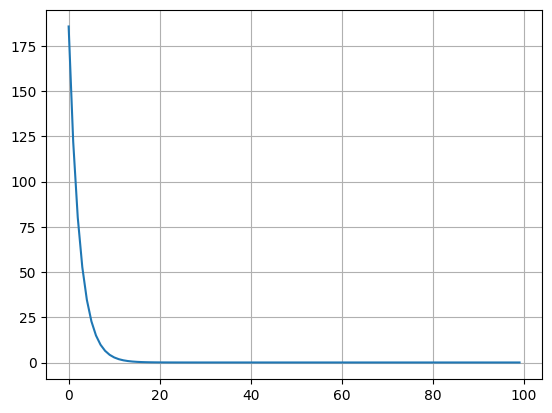

In [40]:
model1=Batch_Gradient_Descent(X,y)
model1.fit(0.01,100)
model1.epoch_graph()

## Stochastic Gradient Descent

In [41]:
X=data[['area','bedrooms']]
y=data['price']

In [42]:
class Stochastic_Gradient_Descent:
  def __init__(self,X,y):
    self.X=X
    self.y=y

  def cost(self,y_true,y_predict):
    return np.sum((y_true-y_predict)**2)

  def fit(self,alpha,epoch,display=False):
    n=X.shape[0]

    w=np.ones(len(self.X.columns))
    b=0

    self.epoch_list=np.arange(0,epoch)
    cost_list=[]

    for _ in range(epoch):
      y_predict=w@self.X.values.T+b

      """Select a test sample randomly and calculate it's cost """
      test=random.randint(0,X.shape[0]-1)

      cost=self.cost(self.y[test],y_predict[test])
      cost_list.append(cost)

      dw=-2*(self.X.values[test]*(self.y[test]-y_predict[test]))/n
      db=-2*np.mean(self.y[test]-y_predict[test])/n

      w=w-alpha*dw
      db=b-alpha*db

      if display==True:
        print(f"epoch = {_} , cost = {cost}")
    self.cost_list=cost_list
    self.w=w
    self.b=b
    return (w,b)
  def predict(self,Xtest):
    y_predicted=self.w@self.Xtest.values.T+self.b
    return y_predicted

  def epoch_graph(self):
    figure(figsize=(8, 6), dpi=80)
    plt.plot(self.epoch_list,self.cost_list)
    plt.grid()
    plt.show()

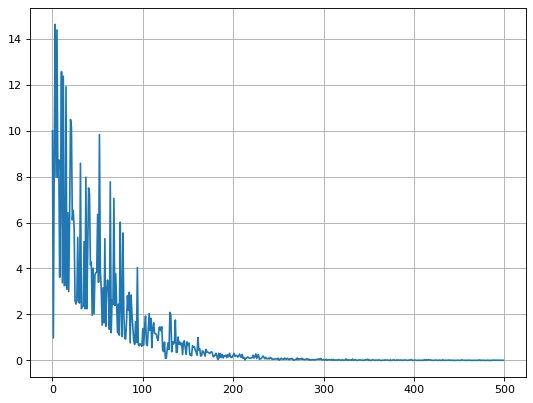

In [43]:
model=Stochastic_Gradient_Descent(X,y)
model.fit(0.01,500,False)
model.epoch_graph()

# Mini-Batch Gradient Descent

In [44]:
X=data[['area','bedrooms']]
y=data['price']

In [45]:
class Mini_Batch_Gradient_Descent:
  def __init__(self,X,y,batch_size):
    self.X=X
    self.y=y
    self.batch=batch_size

  def cost(self,y_true,y_predict):
    return np.sum((y_true-y_predict)**2)

  def fit(self,alpha=0.01,epoch=100,display=False):
    n=X.shape[0]

    w=np.ones(len(self.X.columns))
    b=0

    self.epoch_list=np.arange(0,epoch)
    cost_list=[]

    for _ in range(epoch):
      y_predict=w@self.X.values.T+b

      """Select a test samples randomly and calculate it's cost """
      test=random.choices(np.arange(0,n),k=self.batch)
      sample_X=self.X.iloc[test,:]
      self.y=np.array(self.y)
      sample_y=self.y[test]
      sample_y_predict=y_predict[test]

      cost=self.cost(y,y_predict)
      cost_list.append(cost)

      """Use selected values for calculations """
      dw=-2*(sample_X.values.T@(sample_y-sample_y_predict))/n
      db=-2*np.mean(sample_y-sample_y_predict)/n

      w=w-alpha*dw
      db=b-alpha*db

      if display==True:
        print(f"epoch = {_} , cost = {cost}")
    self.cost_list=cost_list
    self.w=w
    self.b=b
    return (w,b)
  def predict(self,Xtest):
    y_predicted=self.w@self.Xtest.values.T+self.b
    return y_predicted

  def epoch_graph(self):
    figure(figsize=(8, 6), dpi=80)
    plt.plot(self.epoch_list,self.cost_list)
    plt.grid()
    plt.show()

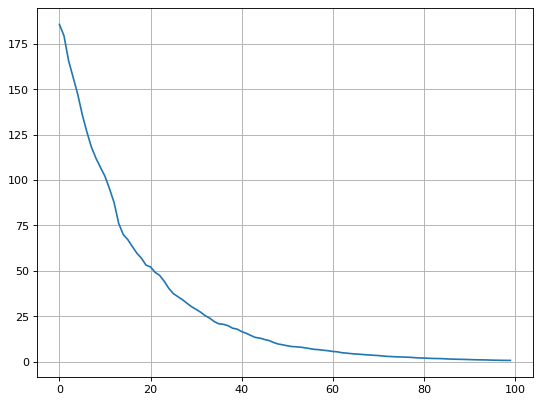

In [46]:
model3=Mini_Batch_Gradient_Descent(X,y,3)
model3.fit()
model3.epoch_graph()

In [47]:
y[[7, 9, 12]]


7     0.911111
9     1.000000
12    0.044444
Name: price, dtype: float64